#  CAO Points Notebook

The Jupyter notebook is in three section

1. Setup
2. Import CAO Points
3. CAO Points comparison comparison, plots and other visualisations

# 1. Set up

- 1.1 Imports
- 1.2 Set Time
- 1.3 CAO URL Availability Function
- 1.4 CAO HTML Save functions
- 1.5 CAO file save function
- 1.6 CAO Webpage links
- 1.7 CAO Points URL


## 1.1 Imports
A requirments.txt is included for a user who may run this analysis using Binder or try at home. 

In [209]:
# Regular expressions 
import re
# Convenient HTTP requests
import requests as rq
# Dates and times
import datetime as dt
# Import numpy module
import numpy as np
# For downloading.
import urllib.request as urlrq
import urllib.parse as urlpar
# Import tabula to read table in pdf
import tabula as tb
# Import mathplotlib
import matplotlib.pyplot as plt
# Import time
import time
# import pandas
import pandas as pd 
# import seaborn
import seaborn as sns
# import Zipfile
from zipfile import ZipFile
# import warnings
import warnings
warnings.filterwarnings("ignore")

## 1.2 Set Time

The time is set at the beginning of the Notebook, to standardise when the files are saved and assist when the data is collected. This allows the option to review any changes that may happen when reading the data from the CAO website.

In [210]:
########################################################################
# Set Datetime Globally for referencing
########################################################################
# Get the current date and time
now = dt.datetime.now()

# format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

print(nowstr)

20211222_111330


## 1.3 CAO URL Availability Function
A function to test if the CAO URLs are available against a 404 request.  HTTP 404, 404 not found, 404, 404 error, page not found or file not found error message is a hypertext transfer protocol (HTTP) standard response code, in computer network communications, to indicate that the browser was able to communicate with a given server, but the server could not find what was requested. The error may also be used when a server does not wish to disclose whether it has the requested information [2]

In [211]:
########################################################################
# Function to test URLs
# https://pytutorial.com/check-url-is-reachable
########################################################################
def url_checker(url):
	try:
		#Get Url
		resp = rq.get(url)
		# if the request succeeds
		if resp.status_code == 404:
			print(f"{url}: is not reachable")
		else:
			print(f"{url}: is reachable")
			

	#Exception
	except rq.exceptions.RequestException as e:
        # print URL with Errs
		raise SystemExit(print(f"{url}: is Not reachable \nErr: {e}"))

## 1.4 CAO HTML Save function

The HTML Save function is a repeatable step and is used to save a copy of each of the HTML pages from 2018 - 2020. It includes a check connection response of 200  as this is a standard response for successful HTTP requests. The actual response will depend on the request method used. In a GET request, the response will contain an entity corresponding to the requested resource. In a POST request, the response will contain an entity describing or containing the result of the action. [3] This allows the user to review any connection issues or changes made on the CAO website

The filename includes the nowstr from the Set Time

In [212]:
########################################################################
# Function to save CAO Webpages 
########################################################################

def htmlcopy(url):
    # Fetch the CAO points URL
    resp = rq.get(url)
    # Check connection '<Response [200]>' means OK
    if resp.status_code == 200:
        print(f"{url}: is reachable")

        path = 'data/' + nowstr + '_CAO_Webpage_' + url[-4:] + '.html'
        print(str(path))

        # Save the original html file.
        with open(path, 'w') as f:
            f.write(resp.text)
    else:
        print(f"{url}: is not reachable")
    

## 1.5 CAO file save function

The save file function is a repeatable step and is used to save a copy of each of the files from 2018 - 2020.


In [213]:
########################################################################
# Function to save files
########################################################################

def caosavefile(url):
    split = urlpar.urlsplit(url)
    path = 'data/' + nowstr + '_CAO_file_' + split.path.split("/")[-1]
    print(str(path))
    urlrq.urlretrieve(url, path)

## 1.6 CAO Webpage links

All the current URL's for CAO 2018 - 2020, using a for loop to copy the HTML pages using the **1.4 CAO HTML Save function**

In [214]:
########################################################################
# CAO web pages
# https://www.cao.ie/index.php?page=points&p=2018
# https://www.cao.ie/index.php?page=points&p=2019
# https://www.cao.ie/index.php?page=points&p=2020
# https://www.cao.ie/index.php?page=points&p=2021
########################################################################

html2018 = 'https://www.cao.ie/index.php?page=points&p=2018'
html2019 = 'https://www.cao.ie/index.php?page=points&p=2019'
html2020 = 'https://www.cao.ie/index.php?page=points&p=2020'
html2021 = 'https://www.cao.ie/index.php?page=points&p=2021'

caopointshtml = [html2018,html2019,html2020,html2021]

for url in caopointshtml:
    htmlcopy(url)

https://www.cao.ie/index.php?page=points&p=2018: is reachable
data/20211222_111330_CAO_Webpage_2018.html
https://www.cao.ie/index.php?page=points&p=2019: is reachable
data/20211222_111330_CAO_Webpage_2019.html
https://www.cao.ie/index.php?page=points&p=2020: is reachable
data/20211222_111330_CAO_Webpage_2020.html
https://www.cao.ie/index.php?page=points&p=2021: is reachable
data/20211222_111330_CAO_Webpage_2021.html


## 1.7 CAO Points URL

The CAO point files links are copied from the saved HTML files. In late November 2021, the CAO changed the link for the 2021 point and consequently how the data is read by pandas

- http://www2.cao.ie/points/l8.php
Change to
- http://www2.cao.ie/points/CAOPointsCharts2021.xlsx

The assessment is updated to read the new xlsx file. To illustrate a working knowledge of the HTML, a copy of the code is for reference below in the section Original 2021 CAO HTML

All the current URL's for CAO points 2018 - 2020, using a for loop to **1.3 CAO URL Availability Function** and **1.5 CAO file save function**

In [215]:
########################################################################
# CAO points files
# http://www2.cao.ie/points/lvl8_18.pdf
# http://www2.cao.ie/points/lvl76_18.pdf
# http://www2.cao.ie/points/lvl8_19.pdf
# http://www2.cao.ie/points/lvl76_19.pdf
# http://www2.cao.ie/points/CAOPointsCharts2020.xlsx
# http://www2.cao.ie/points/CAOPointsCharts2021.xlsx
########################################################################
CAO2021 = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'
CAO2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'
CAO2019_8 = 'http://www2.cao.ie/points/lvl8_19.pdf'
CAO2019_76 = 'http://www2.cao.ie/points/lvl76_19.pdf'
CAO2018_8 = 'http://www2.cao.ie/points/lvl8_18.pdf'
CAO2018_76 = 'http://www2.cao.ie/points/lvl76_18.pdf'

########################################################################
# List of URL 
# Use function to test if available
########################################################################
caopointslist = [CAO2021,CAO2020,CAO2019_8, CAO2019_76,CAO2018_8, CAO2018_76]

for url in caopointslist:
    url_checker(url)
    caosavefile(url)
    

http://www2.cao.ie/points/CAOPointsCharts2021.xlsx: is reachable
data/20211222_111330_CAO_file_CAOPointsCharts2021.xlsx
http://www2.cao.ie/points/CAOPointsCharts2020.xlsx: is reachable
data/20211222_111330_CAO_file_CAOPointsCharts2020.xlsx
http://www2.cao.ie/points/lvl8_19.pdf: is reachable
data/20211222_111330_CAO_file_lvl8_19.pdf
http://www2.cao.ie/points/lvl76_19.pdf: is reachable
data/20211222_111330_CAO_file_lvl76_19.pdf
http://www2.cao.ie/points/lvl8_18.pdf: is reachable
data/20211222_111330_CAO_file_lvl8_18.pdf
http://www2.cao.ie/points/lvl76_18.pdf: is reachable
data/20211222_111330_CAO_file_lvl76_18.pdf


# Set up data 

# 2021 Points
# Load the spreadsheet using pandas

https://www.cao.ie/index.php?page=points&p=2021

In [216]:
# Download and parse the excel spreadsheet.
# 1451 rows × 15 columns
# Skip first 10 Rows
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df = pd.read_excel(CAO2021, skiprows=11)


DF2021 = df[['Course Code','Course Title','R1 Points','R2 Points ','EOS Points','EOS Midpoints', 'CATEGORY (ISCED Description)', 'HEI']] 

DF2021 = DF2021.rename(columns={'Course Code': 'Code', 'Course Title': 'Title', 'R1 Points': '21_R1 Points', 'R2 Points ': '21_R2 Points', 'EOS Points': '21_EOS',
        'EOS Midpoints': '21_Mid', 'CATEGORY (ISCED Description)': 'Category', 'HEI': 'College'})

DF2021

,Code,Title,21_R1 Points,21_R2 Points,21_EOS,21_Mid,Category,College
0,AL605,Music and Instrument Technology,211,NaN,211,319,Engineering and engineering trades,Athlone Institute of Technology
1,AL630,Pharmacy Technician,308,NaN,308,409,Health,Athlone Institute of Technology
2,AL631,Dental Nursing,311,NaN,311,400,Health,Athlone Institute of Technology
3,AL632,Applied Science,297,NaN,297,454,Biological and related sciences,Athlone Institute of Technology
4,AL650,Business,AQA,AQA,AQA,351,Business and administration,Athlone Institute of Technology
...,...,...,...,...,...,...,...,...
1446,WD211,Creative Computing,270,NaN,270,392,Information and Communication Technologies (ICTs),Waterford Institute of Technology
1447,WD212,Recreation and Sport Management,262,NaN,262,304,Personal services,Waterford Institute of Technology
1448,WD230,Mechanical and Manufacturing Engineering,230,230,230,361,Engineering and engineering trades,Waterford Institute of Technology
1449,WD231,Early Childhood Care and Education,266,NaN,266,366,Welfare,Waterford Institute of Technology


# 2020 Points
# Load the spreadsheet using pandas

https://www.cao.ie/index.php?page=points&p=2020


In [217]:
# Download and parse the excel spreadsheet.
# 1464 rows × 23 columns
# Skip first 10 Rows
df = pd.read_excel(CAO2020, skiprows=10)


DF2020 = df[['COURSE CODE2','COURSE TITLE','R1 POINTS','R2 POINTS','EOS','EOS Mid-point','CATEGORY (i.e.ISCED description)', 'HEI']] 

DF2020 = DF2020.rename(columns={'COURSE CODE2': 'Code', 'COURSE TITLE': 'Title', 'R1 POINTS': '20_R1 Points', 'R2 POINTS': '20_R2 Points', 'EOS': '20_EOS', 
    'EOS Mid-point': '20_Mid', 'CATEGORY (i.e.ISCED description)': 'Category', 'HEI': 'College'})

DF2020

,Code,Title,20_R1 Points,20_R2 Points,20_EOS,20_Mid,Category,College
0,AC120,International Business,209,NaN,209,280,Business and administration,American College
1,AC137,Liberal Arts,252,NaN,252,270,Humanities (except languages),American College
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,NaN,#+matric,#+matric,Arts,National College of Art and Design
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,NaN,#+matric,#+matric,Arts,National College of Art and Design
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,NaN,#+matric,#+matric,Arts,National College of Art and Design
...,...,...,...,...,...,...,...,...
1459,WD208,Manufacturing Engineering,188,NaN,188,339,Manufacturing and processing,Waterford Institute of Technology
1460,WD210,Software Systems Development,279,NaN,279,337,Information and Communication Technologies (ICTs),Waterford Institute of Technology
1461,WD211,Creative Computing,271,NaN,271,318,Information and Communication Technologies (ICTs),Waterford Institute of Technology
1462,WD212,Recreation and Sport Management,270,NaN,270,349,Personal services,Waterford Institute of Technology


# 2019 Points
# Load the spreads pdf

https://www.cao.ie/index.php?page=points&p=2019

- CAO2019_8 = 'http://www2.cao.ie/points/lvl8_19.pdf' - 930 rows × 4 columns
- CAO2019_76 = 'http://www2.cao.ie/points/lvl76_19.pdf' - 461 rows × 4 columns
- DF2019 = 1391 rows × 4 columns

https://stackoverflow.com/questions/37826926/how-to-trim-starting-spaces-of-entire-column-in-libreoffice-or-google-sheets

Remove all special charcters



In [218]:
# Read csvs into 2019 pandas dataframe
# https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://www.kite.com/python/answers/how-to-make-a-single-pandas-dataframe-from-multiple-%60.csv%60-files-in-python

csvfiles = ['lvl8_19.csv', 'lvl76_19.csv']

dflist = []

colname = ['Code', 'Title', '19_EOS', '19_Mid']

for filename in csvfiles:
    dflist.append(pd.read_csv(filename, sep=',' , skiprows = 1,header = None, names = colname ))
    
DF2019 = pd.concat(dflist)

DF2019

,Code,Title,19_EOS,19_Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
456,WD188,Applied Health Care,206,339.0
457,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0
458,WD206,Electronic Engineering,191,322.0
459,WD207,Mechanical Engineering,179,330.0


# 2018 Points
# Load the spreads pdf

https://www.cao.ie/index.php?page=points&p=2018

- CAO2018_8 = 'http://www2.cao.ie/points/lvl8_18.pdf' - 914 rows × 4 columns
- CAO2018_76 = 'http://www2.cao.ie/points/lvl76_18.pdf' - 471 rows × 4 columns
- DF2018 = 1385 rows × 4 columns

In [219]:
# Read csvs into 2018 pandas dataframe

csvfiles = ['lvl8_18.csv', 'lvl76_18.csv']

dflist = []

colname = ['Code', 'Title', '18_EOS', '18_Mid']

for filename in csvfiles:
    dflist.append(pd.read_csv(filename, sep=',' , skiprows = 1,header = None, names = colname ))
    
DF2018 = pd.concat(dflist)

DF2018

,Code,Title,18_EOS,18_Mid
0,AL801,Software Design Game Development or Cloud Comp...,295,326.0
1,AL810,Quantity Surveying,300,340.0
2,AL820,Mechanical and Polymer Engineering,299,371.0
3,AL830,General Nursing,418,440.0
4,AL832,Psychiatric Nursing,377,388.0
...,...,...,...,...
466,WD205,Molecular Biology with Biopharmaceutical Science,217,398.0
467,WD206,Electronic Engineering,175,330.0
468,WD207,Mechanical Engineering,182,362.0
469,WD208,Manufacturing Engineering,180,298.0


# Join all Dataframes

DF2021 [['Code', 'Title', '21_R1 Points', '21_R2 Points', '21_EOS', '21_Mid', 'Category', 'College']]

DF2020 [['Code', 'Title', '20_R1 Points', '20_R2 Points', '20_EOS', '20_Mid', 'Category', 'College']]

DF2019 [['Code', 'Title',  '19_EOS', '19_Mid']]

DF2018 [['Code', 'Title',  '18_EOS', '18_Mid']]

Estimate = 1874 courses

In [220]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# Estimate = 1874 indiviual courses codes
# Merge all Dataframes
# Drop all dupicates on Code only

lvl_21 = DF2021[['Code', 'Title']]
lvl_20 = DF2020[['Code', 'Title']]
lvl_19 = DF2019[['Code', 'Title']]
lvl_18 = DF2018[['Code' , 'Title']]

frames = [lvl_21, lvl_20, lvl_19, lvl_18]

Codes = pd.concat(frames)

AllCourses = Codes.drop_duplicates('Code').reset_index(drop=True)

# Add College Code
# https://www.datasciencemadesimple.com/return-first-n-character-from-left-of-column-in-pandas-python/
AllCourses['College Code'] = AllCourses['Code'].str[:2]

AllCourses

,Code,Title,College Code
0,AL605,Music and Instrument Technology,AL
1,AL630,Pharmacy Technician,AL
2,AL631,Dental Nursing,AL
3,AL632,Applied Science,AL
4,AL650,Business,AL
...,...,...,...
1869,TL621,Hotel Operations,TL
1870,TL622,Travel and Tourism Studies,TL
1871,TL720,Travel and Tourism Management,TL
1872,WD040,Building Services Engineering,WD


In [221]:
# Check to see if any missing College code
# https://datatofish.com/rows-with-nan-pandas-dataframe/

AllCourses[AllCourses['College Code'].isna()]

,Code,Title,College Code


In [222]:
# Set indexes of Code for df in AllCourses
AllCourses.set_index('Code', inplace=True)

# Join all EOS 
DF2021.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2021[['College', 'Category', '21_R1 Points', '21_R2 Points','21_EOS', '21_Mid']])

DF2020.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2020[['20_R1 Points', '20_R2 Points','20_EOS', '20_Mid']])

DF2019.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2019[['19_Mid']])

DF2018.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2018[['18_Mid']])

AllCourses

,Title,College Code,College,Category,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
Code,,,,,,,,,,,,,,
AC120,International Business,AC,American College,Business and administration,294,294,294,352,209,NaN,209,280,269.0,288.0
AC137,Liberal Arts,AC,American College,Humanities (except languages),271,270,270,334,252,NaN,252,270,275.0,298.0
AD101,"First Year Art and Design (Common Entry,portfo...",AD,National College of Art and Design,Arts,554,NaN,554,604,#+matric,NaN,#+matric,#+matric,550.0,NaN
AD102,Graphic Design and Moving Image Design (portfo...,AD,National College of Art and Design,Arts,538,NaN,538,625,#+matric,NaN,#+matric,#+matric,635.0,NaN
AD103,Textile and Surface Design and Jewellery and O...,AD,National College of Art and Design,Arts,505,NaN,505,581,#+matric,NaN,#+matric,#+matric,545.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,WD,Waterford Institute of Technology,Information and Communication Technologies (ICTs),270,NaN,270,392,271,NaN,271,318,322.0,326.0
WD212,Recreation and Sport Management,WD,Waterford Institute of Technology,Personal services,262,NaN,262,304,270,NaN,270,349,311.0,338.0
WD230,Mechanical and Manufacturing Engineering,WD,Waterford Institute of Technology,Engineering and engineering trades,230,230,230,361,253,NaN,253,369,348.0,NaN


In [223]:
print('Inspect missing values from dataframe')
AllCourses.isna().sum()

Inspect missing values from dataframe


Title              0
College Code       0
College          423
Category         423
21_R1 Points     458
21_R2 Points    1499
21_EOS           452
21_Mid           441
20_R1 Points     437
20_R2 Points    1552
20_EOS           426
20_Mid           437
19_Mid           506
18_Mid           539
dtype: int64

# CAO Guidelines
matriculation - http://www2.cao.ie/downloads/documents/Guidelines-EU-EFTA.pdf

The matriculation and English language requirements are the minimum and will be higher for certain courses and in certain institutions. Applicants must also refer to HEI websites for details of specific subject requirements and previous points requirements.

# independent.ie
https://www.independent.ie/life/family/learning/understanding-your-cao-course-guide-26505318.html

The Mid point is the points score of the applicant in the middle of a list of offerees placed in points score order

Where the letters AQA appear instead of points, it means that all qualified applicants for a course were offered a place. AQA sometimes suggests that the points of the last qualified applicant being offered a place were less than 100.

# 2021 info on file
You can filter your results by clicking on the dropdown  icon. It is possible to filter by category (i.e. ISCED description), by level, by HEI and by round.  
Example: If you wish to know the points data for all Level 8 Health courses, click on the dropdown icon in the CATEGORY column and select ‘Health’, then select ‘8’ in the Level column.
Clicking on these dropdown filters will return a list of all Level 8 Health courses in all HEIs, with the points requirements for Rounds 1 & 2, as well as EOS (end of season) and EOS Mid-point. For a new search, remember to clear filters from your previous search. 

# 2020 info on files
End of Season
Level 8, 7 & 6 with ISCED Broad Field Code
The details  given are for general information only and do not form part of any contract. They are not intended for use in determining whether any individual applicant is or is not entitled to an offer of a higher education place
Random * = Not all on this points score were offered places
\# = Test / Interview / Portfolio / Audition
AQA = All qualified applicants
avp = Available Places
v = New competition for available places resulted in a higher points cutoff

# 2019 info on file/s
The details given are for general information only and do not form
part of any contract. They are not intended for use in determining
whether any individual applicant is or is not entitled to an offer of a
higher education place
\* Not all on this points score were offered places
\# Test / Interview / Portfolio / Audition
AQA All qualified applicants

# 2018 info on file/s
The details given are for general information only and do not form
part of any contract. They are not intended for use in determining
whether any individual applicant is or is not entitled to an offer of a
higher education place
\* Not all on this points score were offered places
\# Test / Interview / Portfolio / Audition
AQA All qualified applicants


In [224]:
# Replace all AQA with 100
# Replace all # with NAN
# Replace all +matric with NAN
# Replace all blank/empty cells with NAN


# https://stackoverflow.com/questions/38277928/remove-special-characters-in-pandas-dataframe


AllCourses=AllCourses.replace('AQA','100',regex=True)
AllCourses=AllCourses.replace('\#','',regex=True)
AllCourses=AllCourses.replace('\+matric',np.nan,regex=True)
AllCourses=AllCourses.replace('',np.nan)

AllCourses

,Title,College Code,College,Category,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
Code,,,,,,,,,,,,,,
AC120,International Business,AC,American College,Business and administration,294,294,294,352.0,209,NaN,209,280.0,269.0,288.0
AC137,Liberal Arts,AC,American College,Humanities (except languages),271,270,270,334.0,252,NaN,252,270.0,275.0,298.0
AD101,"First Year Art and Design (Common Entry,portfo...",AD,National College of Art and Design,Arts,554,NaN,554,604.0,NaN,NaN,NaN,NaN,550.0,NaN
AD102,Graphic Design and Moving Image Design (portfo...,AD,National College of Art and Design,Arts,538,NaN,538,625.0,NaN,NaN,NaN,NaN,635.0,NaN
AD103,Textile and Surface Design and Jewellery and O...,AD,National College of Art and Design,Arts,505,NaN,505,581.0,NaN,NaN,NaN,NaN,545.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,WD,Waterford Institute of Technology,Information and Communication Technologies (ICTs),270,NaN,270,392.0,271,NaN,271,318.0,322.0,326.0
WD212,Recreation and Sport Management,WD,Waterford Institute of Technology,Personal services,262,NaN,262,304.0,270,NaN,270,349.0,311.0,338.0
WD230,Mechanical and Manufacturing Engineering,WD,Waterford Institute of Technology,Engineering and engineering trades,230,230,230,361.0,253,NaN,253,369.0,348.0,NaN


In [225]:
# https://devenum.com/pandas-convert-multiple-columns-to-float/
AllCourses[['21_R1 Points', '21_R2 Points','21_EOS', '21_Mid','20_R1 Points', '20_R2 Points','20_EOS', '20_Mid', '19_Mid', '18_Mid']]= AllCourses[['21_R1 Points', 
        '21_R2 Points','21_EOS', '21_Mid','20_R1 Points', '20_R2 Points','20_EOS', '20_Mid', '19_Mid', '18_Mid']].apply(pd.to_numeric)

In [226]:
AllCourses.dtypes

Title            object
College Code     object
College          object
Category         object
21_R1 Points    float64
21_R2 Points    float64
21_EOS          float64
21_Mid          float64
20_R1 Points    float64
20_R2 Points    float64
20_EOS          float64
20_Mid          float64
19_Mid          float64
18_Mid          float64
dtype: object

In [227]:
AllCourses.describe()

,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
count,1421.000000,385.000000,1427.000000,1442.000000,1431.000000,331.000000,1440.000000,1433.000000,1379.000000,1346.000000
mean,369.548205,346.714286,364.417659,445.355062,346.308176,323.709970,343.549306,426.192603,398.848441,394.086181
std,146.247017,168.662775,146.783898,126.355244,137.271099,147.087916,138.211344,119.953753,124.675577,122.411865
min,57.000000,60.000000,57.000000,0.000000,55.000000,100.000000,55.000000,57.000000,30.000000,56.000000
25%,261.000000,210.000000,260.000000,368.000000,251.000000,202.500000,249.000000,350.000000,321.500000,319.000000
50%,332.000000,311.000000,327.000000,429.000000,311.000000,300.000000,309.000000,398.000000,369.000000,366.000000
75%,477.000000,477.000000,469.500000,520.000000,430.000000,448.500000,422.250000,478.000000,446.000000,444.000000
max,1028.000000,956.000000,1028.000000,1141.000000,1088.000000,768.000000,1088.000000,1088.000000,1073.000000,1045.000000


(array([ 48., 263., 435., 238., 242., 157.,  15.,  13.,   3.,   7.]),
 array([  57. ,  154.1,  251.2,  348.3,  445.4,  542.5,  639.6,  736.7,
         833.8,  930.9, 1028. ]),
 <BarContainer object of 10 artists>)

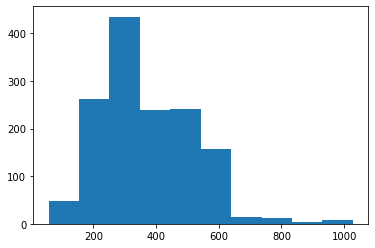

In [228]:
# Histogram of R1 Points for 2021
R121 = AllCourses['21_R1 Points']
plt.hist(R121)

(array([ 51., 369., 474., 261., 209.,  28.,  22.,  12.,   3.,   2.]),
 array([  55. ,  158.3,  261.6,  364.9,  468.2,  571.5,  674.8,  778.1,
         881.4,  984.7, 1088. ]),
 <BarContainer object of 10 artists>)

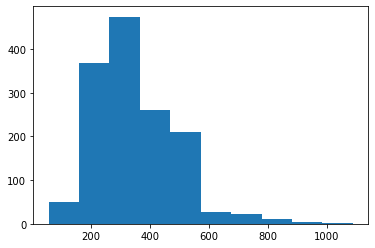

In [229]:
# Histogram of R1 Points for 2021
R120 = AllCourses['20_R1 Points']
plt.hist(R120)

(array([[ 51., 369., 474., 261., 209.,  28.,  22.,  12.,   3.,   2.],
        [103., 678., 895., 527., 461., 114.,  44.,  16.,   7.,   7.]]),
 array([  55. ,  158.3,  261.6,  364.9,  468.2,  571.5,  674.8,  778.1,
         881.4,  984.7, 1088. ]),
 <a list of 2 BarContainer objects>)

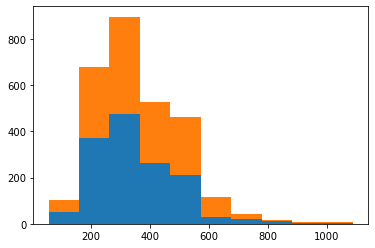

In [230]:
# Creating the array.
x = np.vstack([R120,R121]).T
# Bars stacked on top of each other.
plt.hist(x, stacked=True)

(array([[5.000e+00, 2.100e+01, 4.910e+02, 5.230e+02, 2.380e+02, 1.900e+01,
         1.700e+01, 1.700e+01, 1.300e+01, 2.000e+00],
        [1.200e+01, 3.100e+01, 9.720e+02, 1.090e+03, 4.710e+02, 5.300e+01,
         3.200e+01, 3.100e+01, 2.700e+01, 6.000e+00],
        [1.600e+01, 3.400e+01, 1.263e+03, 1.787e+03, 8.080e+02, 1.070e+02,
         4.600e+01, 4.200e+01, 4.500e+01, 1.000e+01],
        [4.000e+01, 3.400e+01, 1.423e+03, 2.477e+03, 1.197e+03, 2.440e+02,
         6.100e+01, 5.400e+01, 5.500e+01, 1.500e+01]]),
 array([   0. ,  114.1,  228.2,  342.3,  456.4,  570.5,  684.6,  798.7,
         912.8, 1026.9, 1141. ]),
 <a list of 4 BarContainer objects>)

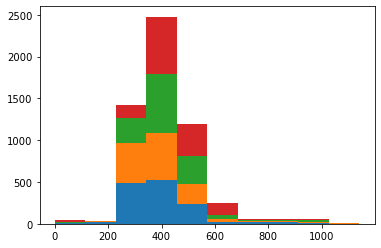

In [231]:
Mid21 = AllCourses['21_Mid']
Mid20 = AllCourses['20_Mid']
Mid19 = AllCourses['19_Mid']
Mid18 = AllCourses['18_Mid']

# Creating the array.
x = np.vstack([Mid18, Mid19, Mid20, Mid21]).T
# Bars stacked on top of each other.
plt.hist(x, stacked=True)


([<matplotlib.axis.XTick at 0x1cbd5ec8220>,
 [Text(0, 0, 'Technological University Dublin'),
  Text(1, 0, 'Trinity College Dublin'),
  Text(2, 0, 'Galway-Mayo Institute of Technology'),
  Text(3, 0, 'Limerick Institute of Technology'),
  Text(4, 0, 'Institute of Technology, Carlow'),
  Text(5, 0, 'Institute of Technology, Sligo'),
  Text(6, 0, 'Cork Institute of Technology'),
  Text(7, 0, 'Dublin City University'),
  Text(8, 0, 'National University of Ireland, Galway'),
  Text(9, 0, 'Waterford Institute of Technology')])

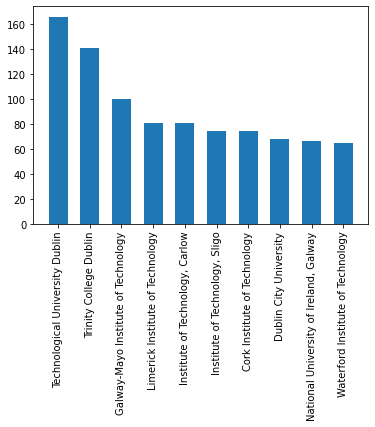

In [249]:
# Which college offer the most courses 2018-2020 top 10

Colcounts = AllCourses['College'].value_counts().head(10)
ColCat = Colcounts.index
plt.bar(ColCat, Colcounts, width=0.6,)
plt.xticks(range(len(ColCat)), ColCat, rotation='vertical')

([<matplotlib.axis.XTick at 0x1cbd5915fa0>,
 [Text(0, 0, 'Arts'),
  Text(1, 0, 'Business and administration'),
  Text(2, 0, 'Information and Communication Technologies (ICTs)'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'Engineering and engineering trades')])

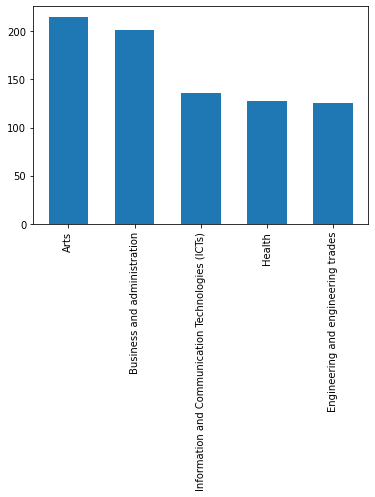

In [250]:
# Which Category of College courses are most on offered from 2018 - 2021 Top 5
Catcounts = AllCourses['Category'].value_counts().head(5)
CatCat = Catcounts.index
plt.bar(CatCat, Catcounts, width=0.6)
plt.xticks(range(len(CatCat)), CatCat, rotation='vertical')


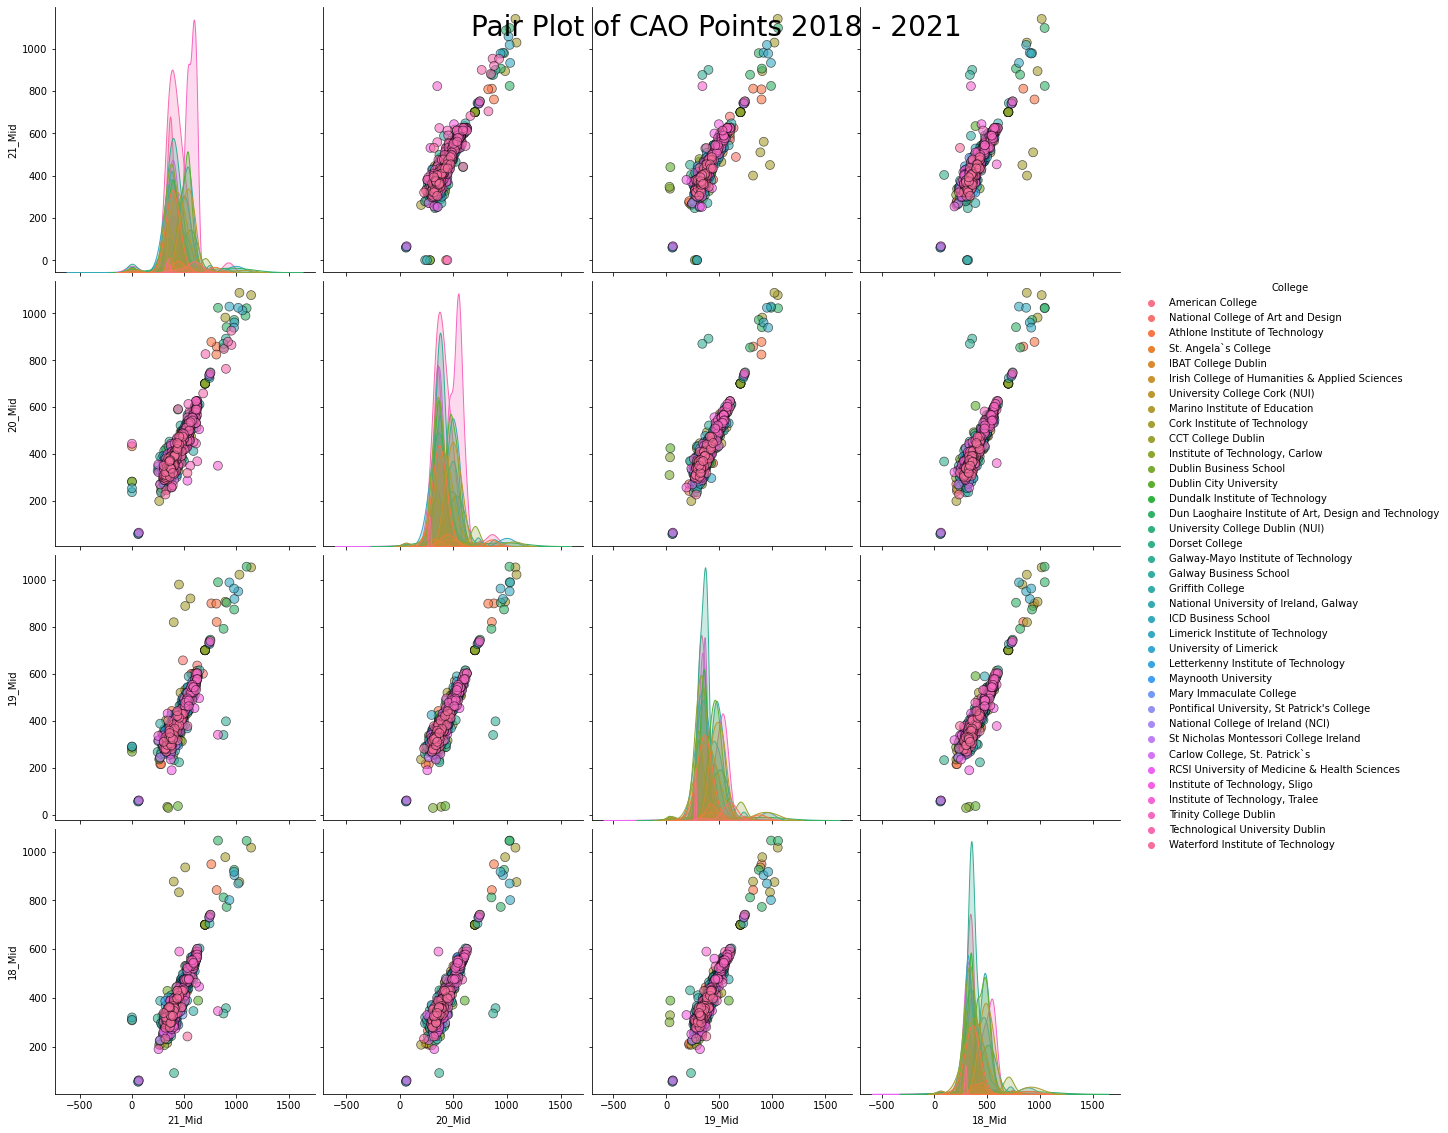

In [251]:
sns.pairplot(AllCourses, 
             vars = ['21_Mid','20_Mid','19_Mid','18_Mid'], 
             hue='College', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);# Title 
plt.suptitle('Pair Plot of CAO Points 2018 - 2021', size = 28);

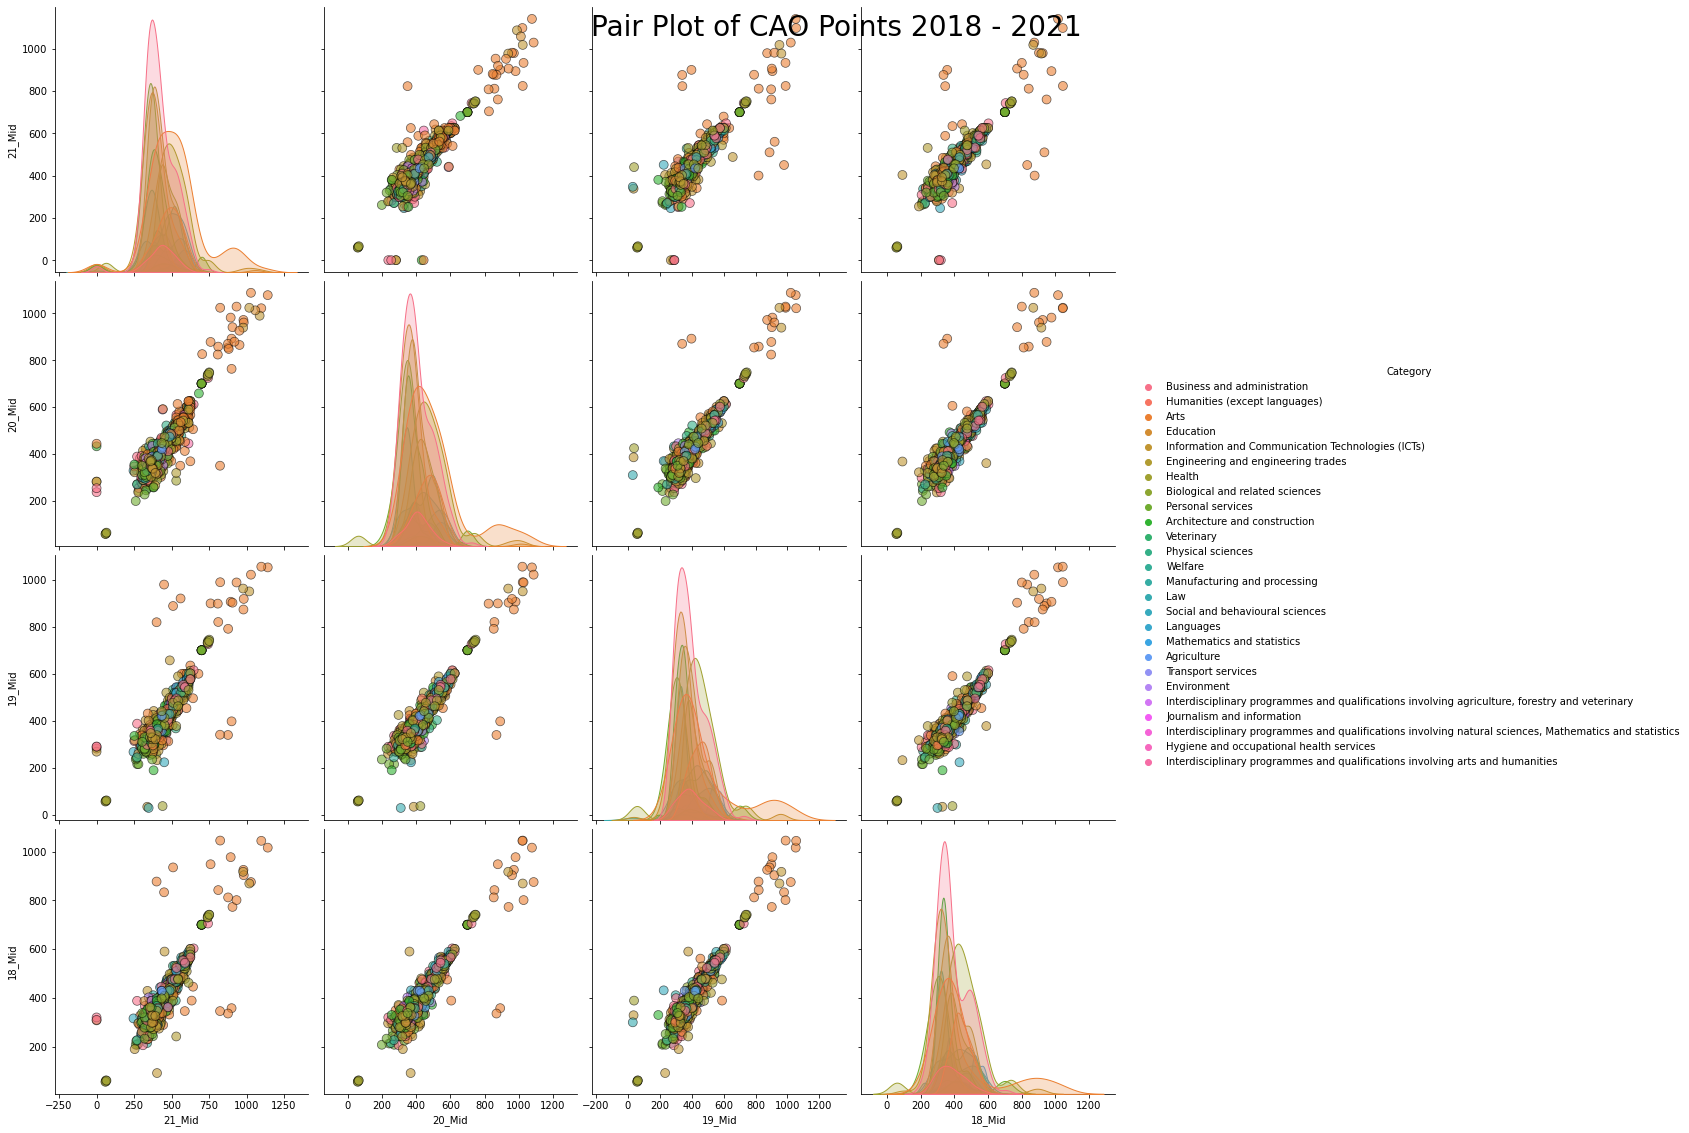

In [235]:
sns.pairplot(AllCourses, 
             vars = ['21_Mid','20_Mid','19_Mid','18_Mid'], 
             hue='Category', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);# Title 
plt.suptitle('Pair Plot of CAO Points 2018 - 2021', size = 28);

<AxesSubplot:xlabel='21_R1 Points', ylabel='College'>

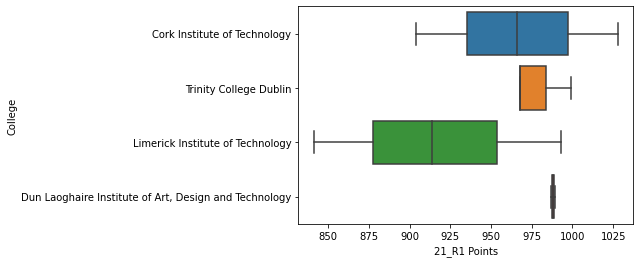

In [256]:
# https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/
# Top 10 points by College Code for 2021
TOPpoints21 = AllCourses.nlargest(10,['21_R1 Points'])
sns.boxplot(y='College', x='21_R1 Points', data=TOPpoints21)

(array([ 800.,  850.,  900.,  950., 1000., 1050., 1100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

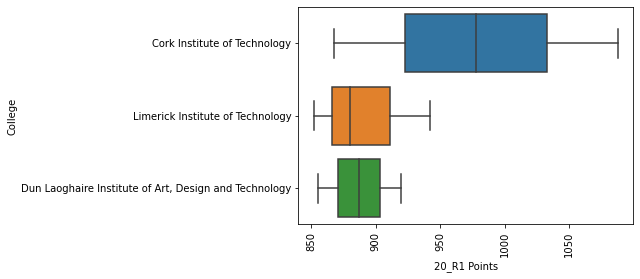

In [257]:
# Top 10 points by College Code for 2020
TOPpoints20 = AllCourses.nlargest(10,['20_R1 Points'])
sns.boxplot(y='College', x='20_R1 Points', data=TOPpoints20)
plt.xticks(rotation=90)

# Reference

[1] https://pytutorial.com/check-url-is-reachable
[2] https://en.wikipedia.org/wiki/HTTP_404
[3] https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

# End

# Original 2021 CAO HTML

During the assessment, the CAO 2021 point was only available via an HTML page, this was updated to Excel sheet. To illustrate a working knowledge of the HTML, a copy of the code is for reference below.

In [238]:
# Fetch the CAO points URL
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Check connection '<Response [200]>' means OK
resp

# Create a file path for the original data.
path = 'data/cao2021_' + nowstr + '.html'

## Error decoding data from the web

Technically, the server says we should decode as per:

- Content-Type: text/html; charset=iso-8859-1

On reviewing the data one line uses \x96 which isn't defined in iso-8859-1.

Therefore a similar decoding standard must be used Windows-1252 (also called CP1252), which is very similar but includes #x96.

https://www.i18nqa.com/debug/table-iso8859-1-vs-windows-1252.html

The character encodings ISO-8859-1, ISO-8859-15 and Windows-1252 are very similar and easily confused. This leads to several typical problems.

Typical Problems:
- Mislabeling text encoded in Windows-1252 as ISO-8859-1 and then converting from ISO-8859-1 to Unicode or other encodings causes the characters in the range 128-159 to be lost. They are converted as if they were control codes and typically display as white space, a specialized question mark, or a square showing the 4 hex digits of the code point. Using an ISO-8859-1 font that does not have the correct glyphs for the Windows-1252 characters will cause the characters to be displayed incorrectly.
- HTML and XML use Unicode code points as the values in Numeric Character References (NCR). Numeric Character References are character escapes written as &#dddd; or &#xhhhh; where the decimal or hexadecimal values are the Unicode code points. Because the first 256 characters in Unicode are identical to the characters in ISO-8859-1, people fall into the habit of using the character code point the are familiar with to create an NCR. However, for the characters in the range of 128-159 in Windows-1252, these are the wrong values. For example the Euro (€) is at code point 0x80 in Windows-1252, but in Unicode it is U+20AC. \&#x80; is the NCR for a control code and will not display as the Euro. The correct NCR is \&#x20AC;.


In [239]:
# The server uses the wrong encoding, fix it.
original_encoding = resp.encoding

# Change to cp1252.
resp.encoding = 'cp1252'

# Save the original html file.
with open(path, 'w') as f:
    f.write(resp.text)

## Use regular expressions

Regular expressions is used to select lines required for the 2021 CAO points dataframe. 

### Online Web tools used

Test regex on 
https://pythex.org/

Compare output of files using notepad ++ plugin
http://www.technicaloverload.com/compare-two-files-using-notepad/

In [240]:
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

# The file path for the csv file.
path = 'data/cao2021_csv_' + nowstr + '.csv'

# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path, 'w') as f:
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57]
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


# Read pdf with tabula-py CAO points 2019 level 8

The assessment was to look at importing data via the tabula module. This method was tried and caused an error with the 2019 data specifically with lvl8_19.pdf on Page 16 and caused an error splitting the page into 3 separate tables. This caused an error when merging pandas data frame and the choice of losing 52 rows of valid data. To illustrate a working knowledge of reading a PDF, a copy of the code is for reference below.

Data copied from pdf to excel = 930 rows × 4 columns
Data imported via tabula-py = 965 rows × 4 columns

In [241]:
# Save file path for the orginal data
path = 'data/cao2019_' + nowstr + '.pdf'

# get data from cao and save to path
urlrq.urlretrieve('http://www2.cao.ie/points/lvl8_19.pdf', path)

# Download and parse the pdf with tabula module
# 
# import module tabula
# Documentation
# https://pypi.org/project/tabula-py/
df = tb.read_pdf('http://www2.cao.ie/points/lvl8_19.pdf', pages='all')
df

[   Course Code                             INSTITUTION and COURSE   EOS    Mid
 0          NaN                    Athlone Institute of Technology   NaN    NaN
 1        AL801    Software Design with Virtual Reality and Gaming   304  328.0
 2        AL802               Software Design with Cloud Computing   301  306.0
 3        AL803  Software Design with Mobile Apps and Connected...   309  337.0
 4        AL805        Network Management and Cloud Infrastructure   329  442.0
 5        AL810                                 Quantity Surveying   307  349.0
 6        AL820                 Mechanical and Polymer Engineering   300  358.0
 7        AL830                                    General Nursing   410  429.0
 8        AL832                                Psychiatric Nursing   387  403.0
 9        AL836                       Nutrition and Health Science   352  383.0
 10       AL837            Sports Science with Exercise Physiology   351  392.0
 11       AL838                         

In [242]:
# Create csv path
csvpath = 'data/cao2019_' + nowstr + '.csv'

# Convert pdf to csv
tb.convert_into( path , csvpath, output_format="csv", pages='all')

# Read csv as a pandas dataframe
df2019 = pd.read_csv(csvpath, sep=',')

df2019

,Course Code,INSTITUTION and COURSE,EOS,Mid
0,NaN,Athlone Institute of Technology,NaN,NaN
1,AL801,Software Design with Virtual Reality and Gaming,304,328
2,AL802,Software Design with Cloud Computing,301,306
3,AL803,Software Design with Mobile Apps and Connected...,309,337
4,AL805,Network Management and Cloud Infrastructure,329,442
...,...,...,...,...
960,WD200,Arts (options),221,296
961,WD210,Software Systems Development,271,329
962,WD211,Creative Computing,275,322
963,WD212,Recreation and Sport Management,274,311


In [243]:
# All row with colleges have NAN 
# Find all rows that have NAN as a value
# https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

# creating bool series True for NaN values 
bool_series = pd.isnull(df2019["Course Code"]) 
    
# filtering data 
# displaying data only with Course Code = NaN 
df2019[bool_series]

,Course Code,INSTITUTION and COURSE,EOS,Mid
0,NaN,Athlone Institute of Technology,NaN,NaN
28,NaN,"Institute of Technology, Carlow",NaN,NaN
62,NaN,"Carlow College, St. Patrick`s",NaN,NaN
66,NaN,Cork Institute of Technology,NaN,NaN
110,NaN,University College Cork (NUI),NaN,NaN
173,NaN,American College,NaN,NaN
176,NaN,CCT College Dublin,NaN,NaN
178,NaN,Marino Institute of Education,NaN,NaN
185,NaN,Dublin Business School,NaN,NaN
209,NaN,Dublin City University,NaN,NaN


# ZIP clean up data folder

https://thispointer.com/python-how-to-create-a-zip-archive-from-multiple-files-or-directory/
https://www.geeksforgeeks.org/working-zip-files-python/

In [244]:
path = 'data/' 
zipfile = 'data/' + nowstr + '_zip_data_.zip'

# create a ZipFile object
with ZipFile(zipfile, 'w') as zip:
   # Iterate over all the files in directory
   for filenames in path:
       if filenames.endswith('.zip'):
           print('miss')
       else:
           zip.write(filename)


       